# Result Analyze

Analyze forecast result using sMAPE.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

## Load Result

Load result using pandas.read_csv.

In [2]:
result = pd.read_csv('data/deepar-predict-result.csv')
result.head()

,date,store_id,y_label,y_pred
0,2019-09-24,0,157.2,12.363743
1,2019-09-25,0,125.2,8.149283
2,2019-09-26,0,154.4,17.012093
3,2019-09-27,0,174.1,10.019235
4,2019-09-28,0,27.0,12.105393


## Group Result

Group result using pandas.groupby.

In [3]:
result_group = result.groupby(['store_id'])
tss = []
forecasts = []
for name, group in result_group:
    ts = list(group['y_label'].values)
    forecast = list(group['y_pred'].values)
    tss.append(ts)
    forecasts.append(forecast)
target = np.array(tss)
forecast = np.array(forecasts)

## Calculate sMAPE

Define a function called smape, and calculate sMAPE.

In [4]:
def smape(target, forecast):
    r"""
    .. math::
        smape = mean(2 * |Y - Y_hat| / (|Y| + |Y_hat|))
    https://www.m4.unic.ac.cy/wp-content/uploads/2018/03/M4-Competitors-Guide.pdf
    """

    denominator = np.abs(target) + np.abs(forecast)
    flag = denominator == 0

    smape = 2 * np.mean(
        (np.abs(target - forecast) * (1 - flag)) / (denominator + flag)
    )
    return smape

In [5]:
smape_values = []
for i in range(len(target)):
    smape_value = smape(target[i], forecast[i])
    smape_values.append(smape_value)

## Show Result

Show sMAPE result using bar plot.

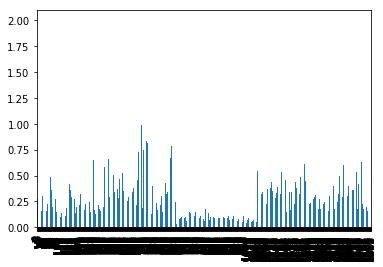

In [6]:
item_metrics = pd.DataFrame({'sMAPE': smape_values})
item_metrics['sMAPE'].plot(kind='bar')

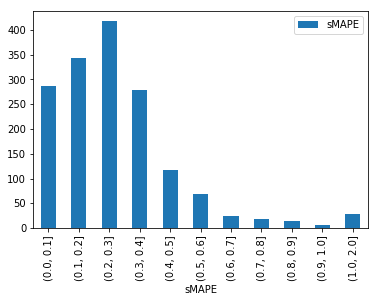

In [7]:
quartiles = pd.cut(item_metrics.sMAPE, [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2])
def get_stats(group):
    return {'sMAPE': group.count()}
grouped = item_metrics.sMAPE.groupby(quartiles)
target_bucket_amount = grouped.apply(get_stats).unstack()
target_bucket_amount.plot(kind='bar')